In [8]:
import keras
from keras import Model
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator

In [9]:
def compile_model(model):
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer='adam',
        metrics=['sparse_categorical_accuracy']
    )

In [10]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    #pyplot.plot(history.history['acc'], color='blue', label='train')
    pyplot.plot(history.history['sparse_categorical_accuracy'], color='blue', label='train')
    #pyplot.plot(history.history['val_acc'], color='orange', label='test')
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.show()
    pyplot.close()

In [11]:
dn = keras.applications.densenet.DenseNet121(include_top=False, input_shape=(128,32,3))
print(rn.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 128, 32, 3)   0                                            
__________________________________________________________________________________________________
zero_padding2d_3 (ZeroPadding2D (None, 134, 38, 3)   0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 64, 16, 64)   9408        zero_padding2d_3[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 64, 16, 64)   256         conv1/conv[0][0]                 
__________________________________________________________________________________________________
conv1/relu

In [13]:
num_classes = 3

# Freeze the layers 
for layer in dn.layers:
    layer.trainable = False
    
x = Flatten()(dn.output)
x = Dense(num_classes, activation = 'softmax')(x)
dn_model = Model(inputs = dn.input, outputs = x)
    
compile_model(dn_model)
print(dn_model.summary())

W0810 18:36:40.314444 4458399168 deprecation_wrapper.py:119] From /usr/local/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 128, 32, 3)   0                                            
__________________________________________________________________________________________________
zero_padding2d_5 (ZeroPadding2D (None, 134, 38, 3)   0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 64, 16, 64)   9408        zero_padding2d_5[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 64, 16, 64)   256         conv1/conv[0][0]                 
__________________________________________________________________________________________________
conv1/relu

Found 2398 images belonging to 3 classes.
Found 283 images belonging to 3 classes.


W0810 18:38:42.985350 4458399168 deprecation.py:323] From /usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20
120/120 [==============================] - 31s 262ms/step - loss: 1.4426 - sparse_categorical_accuracy: 0.3769 - val_loss: 1.0858 - val_sparse_categorical_accuracy: 0.4629
Epoch 2/20
120/120 [==============================] - 27s 226ms/step - loss: 1.4069 - sparse_categorical_accuracy: 0.3756 - val_loss: 1.1841 - val_sparse_categorical_accuracy: 0.2615
Epoch 3/20
120/120 [==============================] - 28s 231ms/step - loss: 1.3123 - sparse_categorical_accuracy: 0.3771 - val_loss: 1.2737 - val_sparse_categorical_accuracy: 0.2615
Epoch 4/20
120/120 [==============================] - 29s 240ms/step - loss: 1.3319 - sparse_categorical_accuracy: 0.3902 - val_loss: 1.4460 - val_sparse_categorical_accuracy: 0.2650
Epoch 5/20
120/120 [==============================] - 32s 265ms/step - loss: 1.3541 - sparse_categorical_accuracy: 0.3965 - val_loss: 1.1666 - val_sparse_categorical_accuracy: 0.3887
Epoch 6/20
120/120 [==============================] - 33s 271ms/step - loss: 1.3230 -

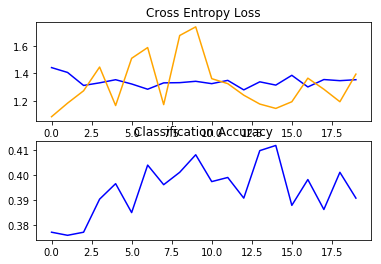

In [14]:
# create data generator
datagen = ImageDataGenerator(rescale=1.0/255.0)
# prepare iterators
train_it = datagen.flow_from_directory('../data/CV/train/',
    class_mode='sparse', batch_size=20, target_size=(128, 32))
test_it = datagen.flow_from_directory('../data/CV/test/',
    class_mode='sparse', batch_size=20, target_size=(128, 32))
# fit model
history = dn_model.fit_generator(train_it, steps_per_epoch=len(train_it),
    validation_data=test_it, validation_steps=len(test_it), epochs=20)
# evaluate model
_, acc = dn_model.evaluate_generator(train_it, steps=len(train_it), verbose=0)
print('> %.3f' % (acc * 100.0))
# learning curves
summarize_diagnostics(history)